# Principal Component Analysis

In [130]:
import numpy as np
import pandas as pd

In [6]:
mat = np.matrix([[4, 2, 2, 7], 
                 [3, 4, 1, 5],
                 [6, 7, 2, 3],
                 [1, 4, 1, 9]])

In [8]:
U_vec, sigma, V_vec = np.linalg.svd(np.matrix(mat))

In [9]:
U_vec

matrix([[-0.49010049, -0.22476588,  0.83491198,  0.1104708 ],
        [-0.42843223,  0.04624753, -0.12071727, -0.89427867],
        [-0.51937735,  0.78594082, -0.13399062,  0.30755603],
        [-0.55361946, -0.57414153, -0.519996  ,  0.30573053]])

In [10]:
sigma

array([16.63041548,  6.13740635,  2.58674138,  0.26512889])

In [11]:
V_vec

matrix([[-0.41583941, -0.51376042, -0.18045294, -0.72839862],
        [ 0.55091389,  0.47910759,  0.09685783, -0.67643799],
        [ 0.63924302, -0.70782626,  0.29424257,  0.06141381],
        [-0.33902776,  0.07408202,  0.93352911, -0.0899746 ]])

In [15]:
mat_1 = np.matrix(U_vec[:, :1]) * np.diag(sigma[:1]) * np.matrix(V_vec[:1, :])
np.round(mat_1, 2)

array([[3.39, 4.19, 1.47, 5.94],
       [2.96, 3.66, 1.29, 5.19],
       [3.59, 4.44, 1.56, 6.29],
       [3.83, 4.73, 1.66, 6.71]])

In [21]:
mat

matrix([[4, 2, 2, 7],
        [3, 4, 1, 5],
        [6, 7, 2, 3],
        [1, 4, 1, 9]])

In [20]:
mat_1 = np.matrix(U_vec[:, :2]) * np.diag(sigma[:2]) * np.matrix(V_vec[:2, :])
np.round(mat_1, 2)

array([[2.63, 3.53, 1.34, 6.87],
       [3.12, 3.8 , 1.31, 5.  ],
       [6.25, 6.75, 2.03, 3.03],
       [1.89, 3.04, 1.32, 9.09]])

In [22]:
mat

matrix([[4, 2, 2, 7],
        [3, 4, 1, 5],
        [6, 7, 2, 3],
        [1, 4, 1, 9]])

In [23]:
mat_1 = np.matrix(U_vec[:, :3]) * np.diag(sigma[:3]) * np.matrix(V_vec[:3, :])
np.round(mat_1, 2)

array([[4.01, 2.  , 1.97, 7.  ],
       [2.92, 4.02, 1.22, 4.98],
       [6.03, 6.99, 1.92, 3.01],
       [1.03, 3.99, 0.92, 9.01]])

In [24]:
mat

matrix([[4, 2, 2, 7],
        [3, 4, 1, 5],
        [6, 7, 2, 3],
        [1, 4, 1, 9]])

## Symmetric Matrix

In [103]:
import matplotlib.pyplot as plt

In [118]:
smiling = plt.imread('smiling.png')

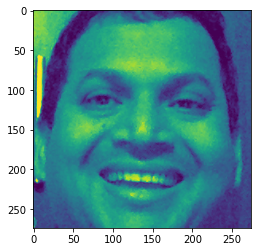

In [119]:
plt.imshow( smiling );

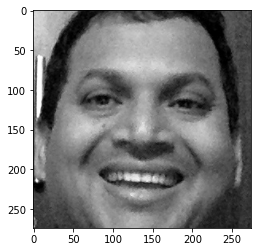

In [120]:
plt.imshow( grayscale, cmap='gray' );

In [121]:
grayscale.shape

(274, 274)

In [123]:
U_vec, sigma, V_vec = np.linalg.svd(np.matrix(grayscale))

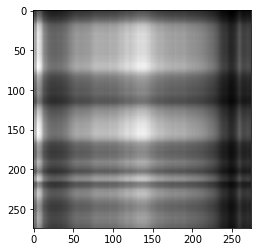

In [124]:
image_1_vec = np.matrix(U_vec[:, :1]) * np.diag(sigma[:1]) * np.matrix(V_vec[:1, :])
plt.imshow(image_1_vec, cmap='gray');

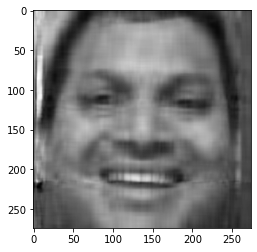

In [125]:
image_1_vec = np.matrix(U_vec[:, :10]) * np.diag(sigma[:10]) * np.matrix(V_vec[:10, :])
plt.imshow(image_1_vec, cmap='gray');

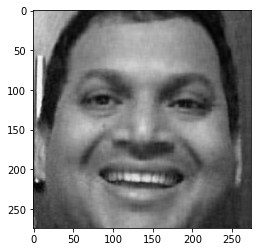

In [126]:
image_1_vec = np.matrix(U_vec[:, :30]) * np.diag(sigma[:30]) * np.matrix(V_vec[:30, :])
plt.imshow(image_1_vec, cmap='gray');

In [135]:
sigma.shape

(274,)

In [127]:
total_variance = np.sum( sigma )
sorted_eig_vals = sorted(sigma, 
                         reverse = True)
var_explained = [(eig_val/total_variance) for eig_val in sorted_eig_vals]

In [128]:
var_explained_cumm = np.cumsum( var_explained )

In [140]:
var_explained_df = pd.DataFrame( {'component': range(1,275), 
                              'var': var_explained[0:274],
                              'var_cumsum': var_explained_cumm[0:274]} )

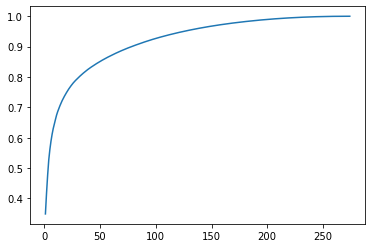

In [141]:
plt.plot(var_explained_df.component,
         var_explained_df.var_cumsum);

## Applying Principal Component Analysis

In [142]:
saheart_ds = pd.read_csv( "../Selection/SAheart.data" )

In [143]:
saheart_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


In [144]:
saheart_ds.sample(10)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
283,285,134,3.00,3.17,17.91,Absent,35,26.37,15.12,27,0
202,203,134,2.75,5.51,26.17,Absent,57,29.87,8.33,33,0
201,202,136,3.15,4.37,20.22,Present,59,25.12,47.16,31,1
271,273,136,2.20,4.16,38.02,Absent,65,37.24,4.11,41,1
146,147,118,1.05,3.16,12.98,Present,46,22.09,16.35,31,0
409,411,120,0.00,3.10,26.97,Absent,41,24.80,0.00,16,0
433,435,120,0.00,2.46,13.39,Absent,47,22.01,0.51,18,0
60,61,142,0.28,1.80,21.03,Absent,57,23.65,2.93,33,0
158,159,122,0.00,3.05,23.51,Absent,46,25.81,0.00,38,0
175,176,122,4.00,5.24,27.89,Present,45,26.52,0.00,61,1


In [145]:
encoded_saheart_ds = pd.get_dummies(saheart_ds, columns=['famhist'], drop_first = True)

In [146]:
encoded_saheart_ds

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,famhist_Present
0,1,160,12.00,5.73,23.11,49,25.30,97.20,52,1,1
1,2,144,0.01,4.41,28.61,55,28.87,2.06,63,1,0
2,3,118,0.08,3.48,32.28,52,29.14,3.81,46,0,1
3,4,170,7.50,6.41,38.03,51,31.99,24.26,58,1,1
4,5,134,13.60,3.50,27.78,60,25.99,57.34,49,1,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,64,28.45,0.00,58,0,0
458,460,182,4.20,4.41,32.10,52,28.61,18.72,52,1,0
459,461,108,3.00,1.59,15.23,40,20.09,26.64,55,0,0
460,462,118,5.40,11.61,30.79,64,27.35,23.97,40,0,0


In [148]:
list(encoded_saheart_ds.columns)

['row.names',
 'sbp',
 'tobacco',
 'ldl',
 'adiposity',
 'typea',
 'obesity',
 'alcohol',
 'age',
 'chd',
 'famhist_Present']

In [149]:
X_features = ['sbp',
              'tobacco',
              'ldl',
              'adiposity',
              'typea',
              'obesity',
              'alcohol',
              'age',
              'famhist_Present']

In [151]:
X = encoded_saheart_ds[X_features]

In [153]:
from sklearn.decomposition import PCA

In [165]:
pca = PCA(n_components=5)
pca.fit(X)

PCA(n_components=5)

In [166]:
pca.transform(X)

array([[ 81.53850561,  17.76524926,   2.88335608,   5.79982493,
          6.41613032],
       [ -6.44784142, -19.47432371, -14.34403367,  -3.98196045,
          3.18925372],
       [-18.84458321,   7.06246272, -14.2549704 ,  -0.26036121,
         -6.86029703],
       ...,
       [ -2.85263634,  24.86851819, -21.88967605,  13.75677673,
         13.12102722],
       [ -2.21712996,  19.48037053,  -8.50833867, -11.25941967,
         -6.16945278],
       [-16.71529678,  -4.44819081,  -6.03088196,  -9.21265008,
          0.49216962]])

In [167]:
pca.explained_variance_

array([644.75799867, 448.65010616, 177.99338849,  95.16708522,
        41.0042092 ])

In [168]:
pca.explained_variance_ratio_

array([0.44988897, 0.31305193, 0.12419739, 0.06640417, 0.02861126])

In [169]:
np.sum(pca.explained_variance_ratio_)

0.9821537369060445